In [1]:
from scipy import fft
import numpy as np
from math import *
from matplotlib import pyplot as plt

In [2]:
def rect(x):
    return 1 if abs(x) < 1 else (0 if abs(x) > 1 else 0.5)

In [3]:
def gauss(x, sigma):
    return np.exp(-(x ** 2) / (sigma ** 2))

In [4]:
A = 5
dt = 0.05

L = 2
sigma = 1

t = np.arange(-A, A, dt, dtype='complex_')

In [5]:
ry1 = np.concatenate(([rect(i / L) for i in t], [0 for i in t]))
gy1 = np.concatenate(([gauss(i, sigma) for i in t], [0 for i in t]))
ry2 = np.concatenate(([rect(i / L * 2) for i in t], [0 for i in t]))
gy2 = np.concatenate(([gauss(i, sigma / 2) for i in t], [0 for i in t]))

In [6]:
y1 = fft.ifft(fft.fft(ry1) * fft.fft(ry2)) * dt
y2 = fft.ifft(fft.fft(gy1) * fft.fft(ry1)) * dt
y3 = fft.ifft(fft.fft(gy1) * fft.fft(gy2)) * dt

In [7]:
t0 = trunc((len(y1) - len(t)) / 2)
y1 = y1[t0:(t0 + len(t))]
y2 = y2[t0:(t0 + len(t))]
y3 = y3[t0:(t0 + len(t))]

c:\users\andrey\appdata\local\programs\python\python39\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
c:\users\andrey\appdata\local\programs\python\python39\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
c:\users\andrey\appdata\local\programs\python\python39\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


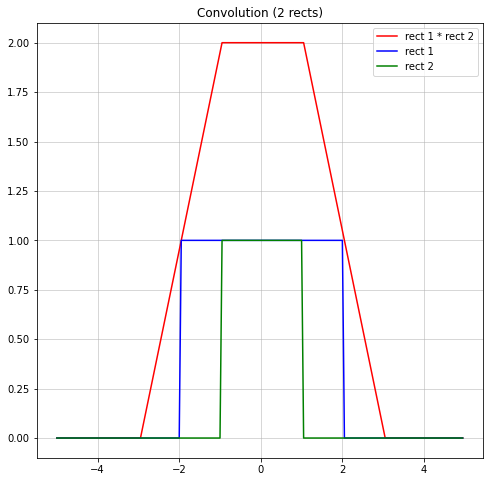

In [8]:
figure, ax = plt.subplots(figsize=(8, 8))
ax.grid(linewidth=0.5)
plt.title('Convolution (2 rects)')
plt.plot(t, np.abs(y1), color='r', label='rect 1 * rect 2')
plt.plot(t, ry1[0:len(t)], color='b', label='rect 1')
plt.plot(t, ry2[0:len(t)], color='g', label='rect 2')
plt.legend()

c:\users\andrey\appdata\local\programs\python\python39\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
c:\users\andrey\appdata\local\programs\python\python39\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
c:\users\andrey\appdata\local\programs\python\python39\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


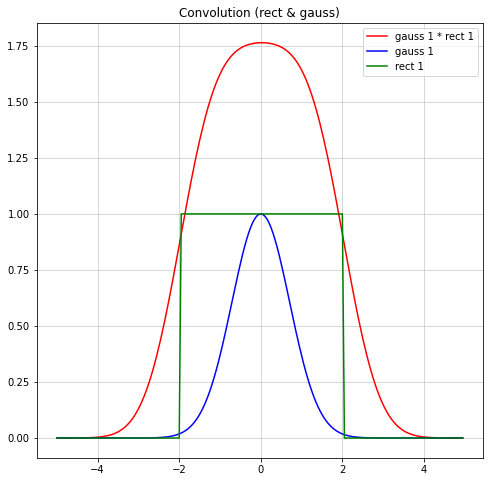

In [9]:
figure, ax = plt.subplots(figsize=(8, 8))
ax.grid(linewidth=0.5)
plt.title('Convolution (rect & gauss)')
plt.plot(t, np.abs(y2), color='r', label='gauss 1 * rect 1')
plt.plot(t, gy1[0:len(t)], color='b', label='gauss 1')
plt.plot(t, ry1[0:len(t)], color='g', label='rect 1')
plt.legend()

c:\users\andrey\appdata\local\programs\python\python39\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
c:\users\andrey\appdata\local\programs\python\python39\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
c:\users\andrey\appdata\local\programs\python\python39\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


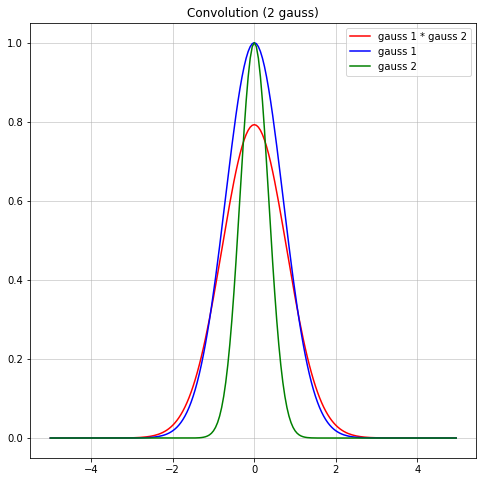

In [10]:
figure, ax = plt.subplots(figsize=(8, 8))
ax.grid(linewidth=0.5)
plt.title('Convolution (2 gauss)')
plt.plot(t, np.abs(y3), color='r', label='gauss 1 * gauss 2')
plt.plot(t, gy1[0:len(t)], color='b', label='gauss 1')
plt.plot(t, gy2[0:len(t)], color='g', label='gauss 2')
plt.legend()